# Copia: quickstart

In [ ]:
import pandas as pd

Load data:

In [15]:
df = pd.read_csv('datasets/eng.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Alexander Fragment A,"Oxford, Bodleian Library, MS Greaves 60 (folio..."
1,Alexander and Dindimus (Alexander Fragment B),"Oxford, Bodleian Library, MS Bodley 264 (folio..."
2,Alexander-Cassamus,"Cambridge University Library, MS Ff.1.6 (Finde..."
3,Alliterative Morte Arthure,"Lincoln Cathedral Library, MS 91 (Thornton Man..."
4,Amis and Amiloun,"Edinburgh, National Library of Scotland, MS Ad..."


Convert to abundance data:

In [16]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)
print(abundance.sum())

[ 1  1  1  1  4  1  1  6  1  1  1  5  9  1  1  1  1  1  4  1  1  4 27  3
  1  1  1  6  2  1  1  1  1  3  1  3  3  1  1  1  6  1  1  1  3  1  1  6
  8 10  1  1  4  9  1  2  2  6  2  7  1  1  2  9  3  1  3  1  1  4  1  1
  1  1 12  1  1  2  1  1  1]
228


In [17]:
import copia.plot as plot
#plot.species_accumulation_curve(abundance, incl_minsample=False)

In [18]:
#plot.species_accumulation_curve(abundance, incl_minsample=True)

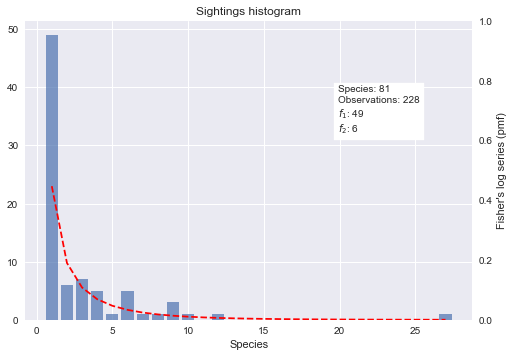

In [19]:
plot.abundance_histogram(abundance)

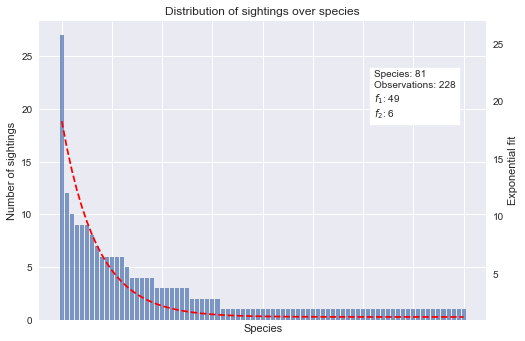

In [20]:
plot.abundance_counts(abundance)

Apply chao1:

In [24]:
from copia.richness import diversity
print('Empirical (species):', diversity(abundance)) # = diversity(abundance, method='empirical')
print('Empirical (sightings):', diversity(abundance, species=False))
print('chao1:', diversity(abundance, method='chao1'))
print('iChao1:', diversity(abundance, method='iChao1'))
print('ACE:', diversity(abundance, method='ACE'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

Empirical (species): 81
Empirical (sightings): 228
chao1: 280.2057748538012
iChao1: 295.8857748538012
ACE: 146.1760505319149
Egghe & Proot: 370.9760362870347
Jackknife: 311.9999999999999


In [25]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, return_ci=True))
print(diversity(abundance, method='jackknife', return_ci=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

{'richness': 311.9999999999999, 'order': 5}
{'richness': 311.9999999999999, 'order': 5, 'lci': 206.78077969667095, 'uci': 417.2192203033288}
{'richness': 311.9999999999999, 'lci': 206.78077969667095, 'uci': 417.2192203033288}
{'richness': 311.9999999999999, 'lci': 206.78077969667095, 'uci': 417.2192203033288}


In [26]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

7555.403155403155
7555.403155403155
7555.411168445549
7555.403155403155


## Compare multiple assemblages

In [27]:
assemblages = {}
for lang in ('dum', 'isl', 'gle', 'eng'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: divide by zero encountered in long_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: invalid value encountered in double_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
100%|██████████| 1000/1000 [00:00<00:00, 17760.43it/s]
/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: divide by zero encountered in long_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: invalid value enc

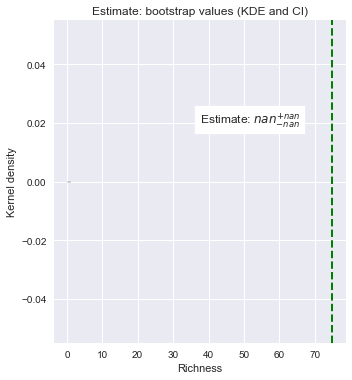

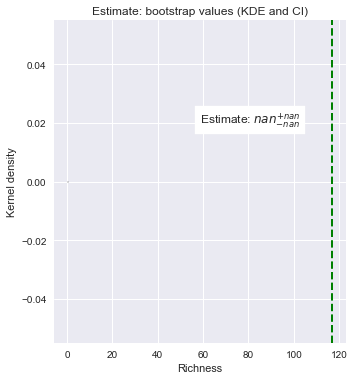

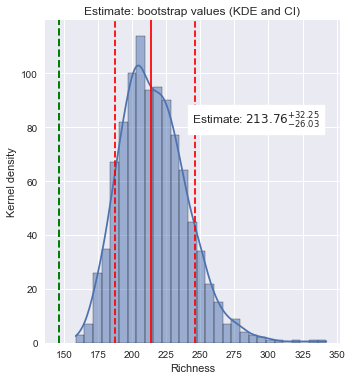

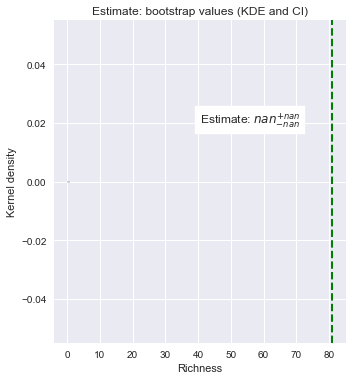

In [28]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: divide by zero encountered in long_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: invalid value encountered in double_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: divide by zero encountered in long_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
/Users/mikekestemont/GitRepos/copia/copia/richness.py:112: RuntimeWarning: invalid value encountered in double_scalars
  iCh1 = ch1 + (f3 / (4 * f4)) * np.max((f1 - ((f2 * f3) / (2 * f4)), 0))
100%|██████████| 1000/1000 [00:00<00:00, 20888.07it/s]


,label,survival,lCI,uCI
0,dum,0.437208,NaN,NaN
1,isl,0.731366,0.882176,0.593573
2,gle,0.675742,0.826978,0.541627
3,eng,0.273754,NaN,NaN


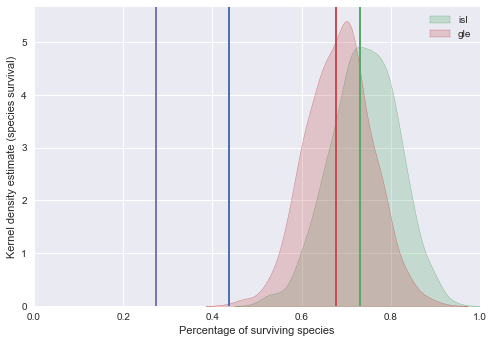

In [14]:
df = plot.survival(assemblages, method='iChao1')
df

In [ ]:
plot.survival_error(df)

In [ ]:
df = plot.survival(assemblages, method='minsample')
plot.survival_error(df)
df